<a href="https://colab.research.google.com/github/Shamil2007/Machine-Learning/blob/main/bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 61.3MB/s]


In [2]:
!unzip /content/bank-customer-churn-prediction.zip

Archive:  /content/bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/bank-customer-churn-prediction.zip")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


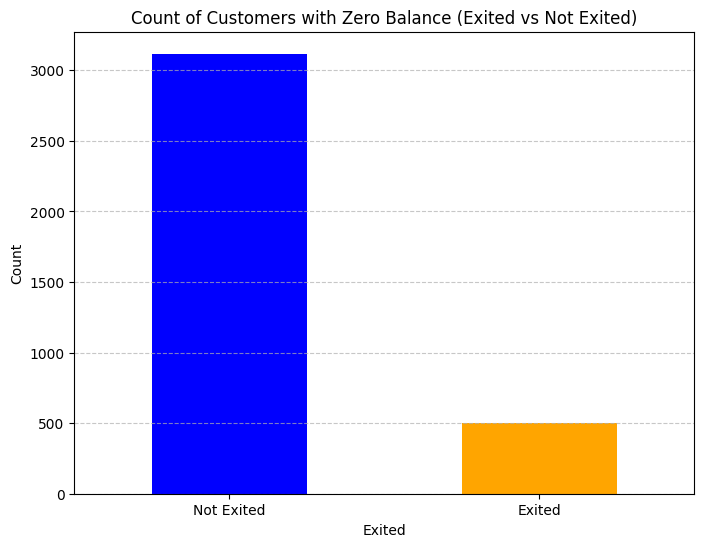

In [6]:
zero_balance_df = df[df['Balance'] == 0.00]

exit_counts = zero_balance_df['Exited'].value_counts()

plt.figure(figsize=(8, 6))
exit_counts.plot(kind='bar', color=['blue', 'orange'])

plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Customers with Zero Balance (Exited vs Not Exited)')
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [7]:
df['Age'].min(), df['Age'].max()

(18, 92)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
X = df.drop('Exited', axis = 1)
y = df['Exited'].copy()
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [12]:
X_num_train = X_train.select_dtypes(include=np.number)
X_cat_train = X_train.select_dtypes(include='object')

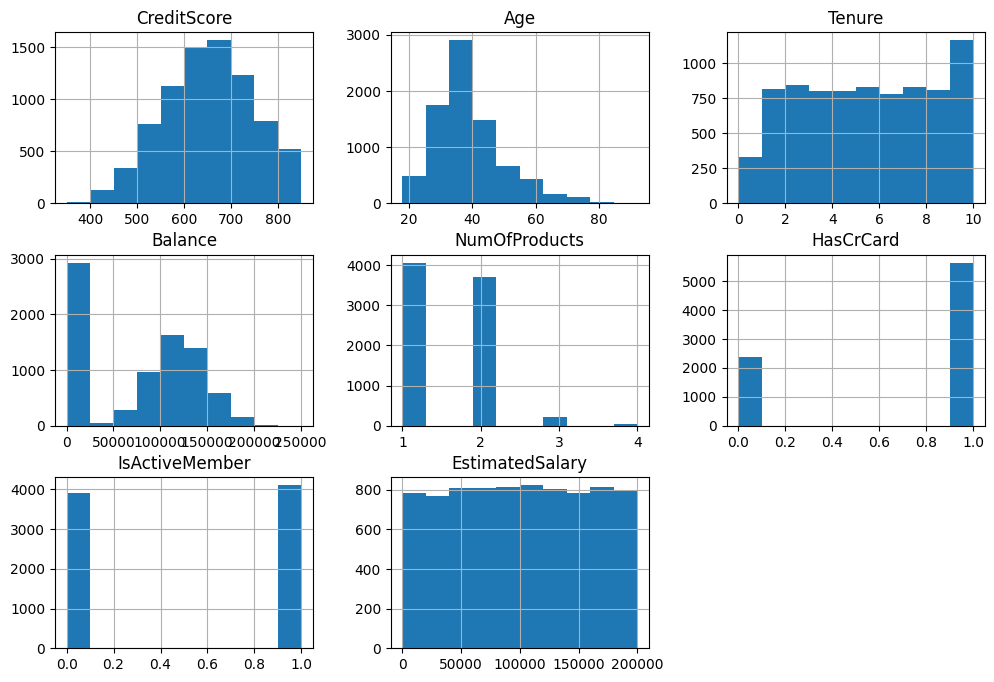

In [13]:
X_num_train.hist(figsize=(12, 8));

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
X_num_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='median')),
    ('Scaler', StandardScaler()),
    ('Poly', PolynomialFeatures(degree=2, include_bias=False)),
])

X_cat_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown="ignore"))
])

transformer = ColumnTransformer([
    ('X_num', X_num_pipeline, X_num_train.columns),
    ('X_cat', X_cat_pipeline, X_cat_train.columns)
], remainder='passthrough')

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
full_pipeline_logistic = Pipeline([
    ('preprocessing', transformer),
    ('lr', LogisticRegression())
])

full_pipeline_logistic.fit(X_train, y_train)
print(f"Train score: {full_pipeline_logistic.score(X_train, y_train)}, Test score: {full_pipeline_logistic.score(X_test, y_test)}")

Train score: 0.858125, Test score: 0.858


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
full_pipeline_tree = Pipeline([
    ('preprocessing', transformer),
    ('tree', DecisionTreeClassifier())
])

full_pipeline_tree.fit(X_train, y_train)
print(f"Train score: {full_pipeline_tree.score(X_train, y_train)}, Test score: {full_pipeline_tree.score(X_test, y_test)}")

Train score: 1.0, Test score: 0.7855


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
full_pipeline_forest = Pipeline([
    ('preprocessing', transformer),
    ('forest', RandomForestClassifier())
])

full_pipeline_forest.fit(X_train, y_train)
print(f"Train score: {full_pipeline_forest.score(X_train, y_train)}, Test score: {full_pipeline_forest.score(X_test, y_test)}")

Train score: 1.0, Test score: 0.8675


In [23]:
params_forest = {
    'forest__n_estimators': [20, 40, 60],
    'forest__criterion': ['gini', 'entropy'],
    'forest__max_depth': [4, 6, 8],
    'forest__min_samples_split': [2, 3, 4],
    'forest__min_samples_leaf': [2, 3, 4],
    'forest__n_jobs': [-1]
}

grid_forest = GridSearchCV(full_pipeline_forest, params_forest, cv=3)
grid_forest.fit(X_train, y_train)

print("Best parameters:", grid_forest.best_params_)

Best parameters: {'forest__criterion': 'gini', 'forest__max_depth': 8, 'forest__min_samples_leaf': 2, 'forest__min_samples_split': 4, 'forest__n_estimators': 20, 'forest__n_jobs': -1}


In [24]:
grid_forest.best_estimator_.fit(X_train, y_train)
print(f"Train score: {grid_forest.best_estimator_.score(X_train, y_train)}, Test score: {grid_forest.best_estimator_.score(X_test, y_test)}")

Train score: 0.87875, Test score: 0.863


In [25]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(n_jobs=-1)),
        ('rf', RandomForestClassifier(
            criterion='gini',
            max_depth=8,
            min_samples_leaf=2,
            min_samples_split=4,
            n_estimators=20,
            n_jobs=-1
        ))
    ],
    voting='soft'
)

voting_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('voting', voting_clf)
])

voting_pipeline.fit(X_train, y_train)
print(f"Train score: {voting_pipeline.score(X_train, y_train)}, Test score: {voting_pipeline.score(X_test, y_test)}")

Train score: 0.868375, Test score: 0.8665
